In [81]:
import numpy as np

A = np.random.randint(100, size=(21, 17))
A

array([[28, 66, 40, 78, 58, 46, 50, 97, 20, 42, 37,  7, 25, 79, 31,  3,
        38],
       [66, 21, 46, 60, 82, 98,  9, 20, 23, 57, 38, 81, 91, 99, 49, 96,
        68],
       [46, 55, 69,  9, 61,  5, 72, 54,  3, 15, 57, 97, 15, 40, 18, 88,
         3],
       [74, 77,  3, 59, 63,  6, 44, 85, 97, 13, 42, 65, 50, 24, 99, 89,
        42],
       [27, 13, 42, 24, 93,  2, 90, 57, 27, 49, 80, 41, 77, 92, 93, 83,
        80],
       [41, 57, 33, 55, 74, 37,  9, 52, 41, 53, 89,  1, 34, 73,  0, 53,
        41],
       [78, 18,  2, 22, 94, 68, 86, 76, 74, 38, 57, 11,  6, 33, 54, 82,
        49],
       [80,  0, 83, 43, 79, 69,  2,  6, 45, 11, 83,  6, 13, 10, 83, 96,
        82],
       [16, 84, 57, 66, 22, 49,  2, 18, 78, 98, 37,  0, 99, 55, 49, 23,
        60],
       [97, 54, 65, 36, 40,  8, 64, 15, 35, 14, 25, 23, 82, 53, 51, 73,
        35],
       [67,  6, 50, 87, 84, 17, 55, 95, 38, 33, 72, 82, 70,  9, 16, 98,
        12],
       [90, 86, 88, 42, 15, 96, 62, 84, 49,  1, 26, 72, 73, 92, 1

In [32]:
def find_closest_element(z, A):
    idx = np.unravel_index(np.abs(A - z).argmin(), A.shape)
    closest_element = A[idx]
    return closest_element


z = 5
find_closest_element(z, A)

5

In [34]:
def find_average(array):
    flattened_array = np.array(array).flatten()
    return sum(flattened_array) / len(flattened_array)

find_average(A)    

49.364145658263304

In [36]:
def find_median(array):
    flattened_array = np.array(array).flatten()
    sorted_arr = sorted(flattened_array)
    n = len(sorted_arr)
    if n % 2 == 0:
        median = (sorted_arr[n // 2 - 1] + sorted_arr[n // 2]) / 2
    else:
        median = sorted_arr[n // 2]
    return median

result = find_median(A)
result

49

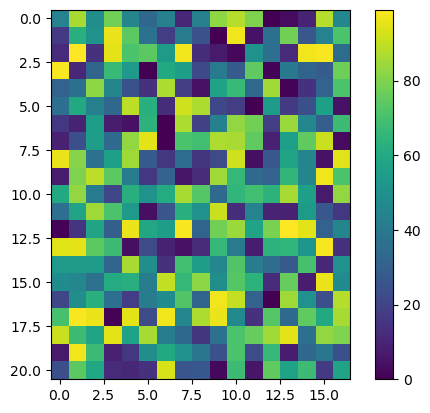

In [37]:
import matplotlib.pyplot as plt

plt.imshow(A, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.show()

In [116]:
A_copy = A.copy()
num_to_nullify = 10
indices_to_nullify = np.random.choice(A_copy.size, num_to_nullify, replace=False)
A_copy.flat[indices_to_nullify] = 0

A_copy

array([[28, 66, 40, 78, 58, 46,  0, 97, 20, 42, 37,  7, 25, 79, 31,  0,
        38],
       [66, 21, 46,  0, 82, 98,  9, 20, 23, 57, 38, 81, 91, 99, 49, 96,
        68],
       [46, 55, 69,  9, 61,  5, 72, 54,  3, 15, 57, 97, 15, 40, 18, 88,
         0],
       [74, 77,  3, 59, 63,  6, 44, 85, 97, 13, 42, 65,  0, 24, 99, 89,
        42],
       [27, 13, 42, 24, 93,  2, 90, 57, 27, 49, 80, 41, 77, 92, 93, 83,
        80],
       [41, 57, 33, 55, 74, 37,  9, 52,  0, 53, 89,  1, 34, 73,  0, 53,
        41],
       [78, 18,  2, 22, 94, 68, 86, 76, 74, 38, 57, 11,  6, 33, 54, 82,
        49],
       [80,  0, 83, 43, 79, 69,  2,  6, 45, 11, 83,  6, 13, 10, 83, 96,
        82],
       [16, 84, 57, 66, 22, 49,  2, 18, 78, 98, 37,  0, 99, 55, 49, 23,
        60],
       [97, 54, 65, 36, 40,  8, 64, 15, 35, 14, 25, 23, 82, 53, 51, 73,
        35],
       [67,  6, 50, 87, 84, 17, 55, 95, 38, 33, 72, 82, 70,  9, 16, 98,
        12],
       [90, 86, 88, 42, 15, 96, 62, 84, 49,  1, 26, 72, 73, 92, 1

In [118]:
def interpolate_missing_values(array):
    rows, cols = array.shape

    for i in range(rows):
        row = array[i, :]
        known_indexes = np.where(row != 0)[0]
        unknown_indexes = np.where(row == 0)[0]
        if len(known_indexes) >= 2 and len(unknown_indexes) > 0:
            for idx in unknown_indexes:
                prev_index = max(known_indexes[known_indexes < idx], default=None)
                next_index = min(known_indexes[known_indexes > idx], default=None)
                if prev_index is not None and next_index is not None:
                    array[i, idx] = np.interp(idx, [prev_index, next_index], [row[prev_index], row[next_index]])

    return array


x = interpolate_missing_values(A_copy)
x

array([[28, 66, 40, 78, 58, 46, 71, 97, 20, 42, 37,  7, 25, 79, 31, 34,
        38],
       [66, 21, 46, 64, 82, 98,  9, 20, 23, 57, 38, 81, 91, 99, 49, 96,
        68],
       [46, 55, 69,  9, 61,  5, 72, 54,  3, 15, 57, 97, 15, 40, 18, 88,
         0],
       [74, 77,  3, 59, 63,  6, 44, 85, 97, 13, 42, 65, 44, 24, 99, 89,
        42],
       [27, 13, 42, 24, 93,  2, 90, 57, 27, 49, 80, 41, 77, 92, 93, 83,
        80],
       [41, 57, 33, 55, 74, 37,  9, 52, 52, 53, 89,  1, 34, 73, 63, 53,
        41],
       [78, 18,  2, 22, 94, 68, 86, 76, 74, 38, 57, 11,  6, 33, 54, 82,
        49],
       [80, 81, 83, 43, 79, 69,  2,  6, 45, 11, 83,  6, 13, 10, 83, 96,
        82],
       [16, 84, 57, 66, 22, 49,  2, 18, 78, 98, 37, 68, 99, 55, 49, 23,
        60],
       [97, 54, 65, 36, 40,  8, 64, 15, 35, 14, 25, 23, 82, 53, 51, 73,
        35],
       [67,  6, 50, 87, 84, 17, 55, 95, 38, 33, 72, 82, 70,  9, 16, 98,
        12],
       [90, 86, 88, 42, 15, 96, 62, 84, 49,  1, 26, 72, 73, 92, 1

In [124]:
def min_max_normalization(array):
    return (array - np.min(array)) / (np.max(array) - np.min(array))

normalized_array = min_max_normalization(A_copy)
normalized_array

array([[0.28282828, 0.66666667, 0.4040404 , 0.78787879, 0.58585859,
        0.46464646, 0.71717172, 0.97979798, 0.2020202 , 0.42424242,
        0.37373737, 0.07070707, 0.25252525, 0.7979798 , 0.31313131,
        0.34343434, 0.38383838],
       [0.66666667, 0.21212121, 0.46464646, 0.64646465, 0.82828283,
        0.98989899, 0.09090909, 0.2020202 , 0.23232323, 0.57575758,
        0.38383838, 0.81818182, 0.91919192, 1.        , 0.49494949,
        0.96969697, 0.68686869],
       [0.46464646, 0.55555556, 0.6969697 , 0.09090909, 0.61616162,
        0.05050505, 0.72727273, 0.54545455, 0.03030303, 0.15151515,
        0.57575758, 0.97979798, 0.15151515, 0.4040404 , 0.18181818,
        0.88888889, 0.        ],
       [0.74747475, 0.77777778, 0.03030303, 0.5959596 , 0.63636364,
        0.06060606, 0.44444444, 0.85858586, 0.97979798, 0.13131313,
        0.42424242, 0.65656566, 0.44444444, 0.24242424, 1.        ,
        0.8989899 , 0.42424242],
       [0.27272727, 0.13131313, 0.42424242, 0.242424

# SciPy

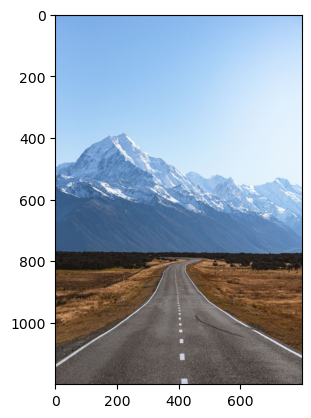

In [26]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('/Users/mmosvlad/Downloads/image.jpg')

imgplot = plt.imshow(img)
plt.show()

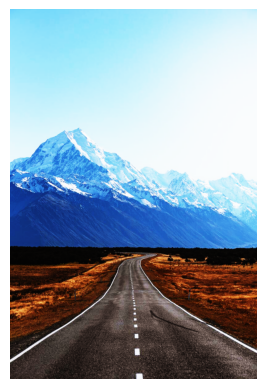

In [14]:
import matplotlib.pyplot as plt
from skimage import exposure
import matplotlib.image as mpimg

gamma = 0.8
contrast_img = exposure.adjust_gamma(img, gamma)

plt.imshow(contrast_img)
plt.axis('off')
plt.show()


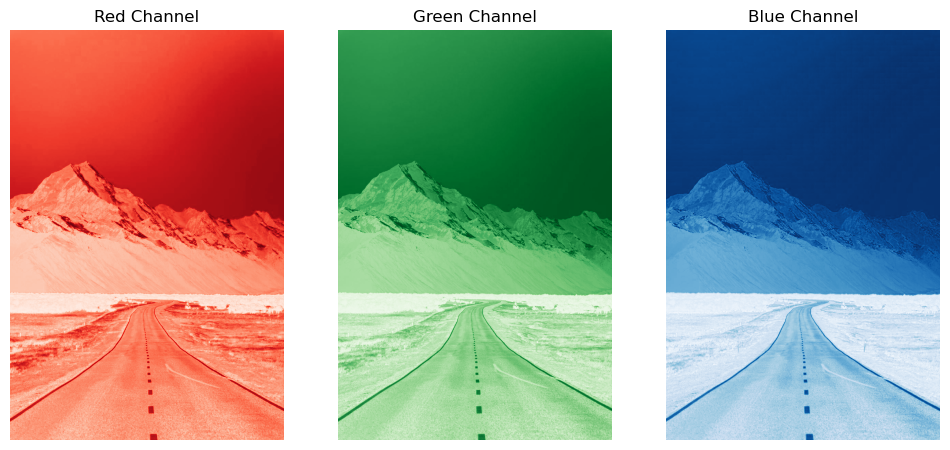

In [15]:
red_channel = img[:, :, 0]
green_channel = img[:, :, 1]
blue_channel = img[:, :, 2]

# Відображення окремих каналів
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(red_channel, cmap='Reds')
plt.title('Red Channel')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(green_channel, cmap='Greens')
plt.title('Green Channel')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(blue_channel, cmap='Blues')
plt.title('Blue Channel')
plt.axis('off')

plt.show()

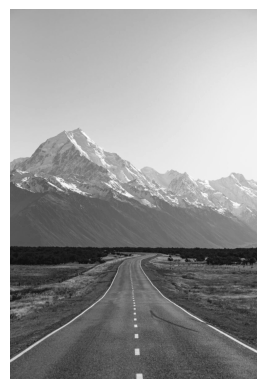

In [24]:
from skimage.color import rgb2gray

gray_img = rgb2gray(img)

plt.imshow(gray_img, cmap='gray')
plt.axis('off')
plt.show()


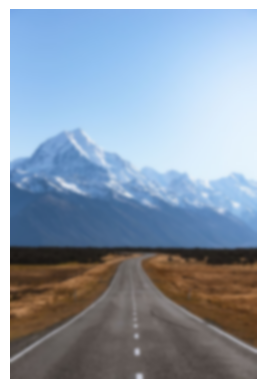

In [35]:
blurred_img = ndimage.gaussian_filter(img, sigma=(5,5,0))

plt.imshow(blurred_img)
plt.axis('off')
plt.show()


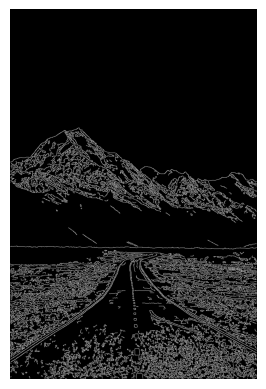

In [34]:
from skimage import color, feature

gray_img = color.rgb2gray(img)

edge_img = feature.canny(gray_img)


plt.imshow(edge_img, cmap='gray')
plt.axis('off')
plt.show()
